In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [15]:
Brand = pd.read_excel("./data/SoftDrink.xlsx", header=0, usecols=[0])

In [16]:
Brand.head()

,Brand Purchased
0,Coke Classic
1,Diet Coke
2,Pepsi
3,Diet Coke
4,Coke Classic


In [17]:
brands = Brand['Brand Purchased']
brands

0     Coke Classic
1        Diet Coke
2            Pepsi
3        Diet Coke
4     Coke Classic
5     Coke Classic
6       Dr. Pepper
7        Diet Coke
8            Pepsi
9            Pepsi
10    Coke Classic
11      Dr. Pepper
12          Sprite
13    Coke Classic
14       Diet Coke
15    Coke Classic
16    Coke Classic
17          Sprite
18    Coke Classic
19       Diet Coke
20    Coke Classic
21       Diet Coke
22    Coke Classic
23          Sprite
24           Pepsi
25    Coke Classic
26    Coke Classic
27    Coke Classic
28           Pepsi
29    Coke Classic
30          Sprite
31      Dr. Pepper
32           Pepsi
33       Diet Coke
34           Pepsi
35    Coke Classic
36    Coke Classic
37    Coke Classic
38           Pepsi
39      Dr. Pepper
40    Coke Classic
41       Diet Coke
42           Pepsi
43           Pepsi
44           Pepsi
45           Pepsi
46    Coke Classic
47      Dr. Pepper
48           Pepsi
49          Sprite
Name: Brand Purchased, dtype: object

In [19]:
brand, counts = np.unique(brands, return_counts=True)
brand, counts

(array(['Coke Classic', 'Diet Coke', 'Dr. Pepper', 'Pepsi', 'Sprite'],
       dtype=object),
 array([19,  8,  5, 13,  5]))

In [21]:
#도수
column1 = brands.value_counts()
column1

Coke Classic    19
Pepsi           13
Diet Coke        8
Dr. Pepper       5
Sprite           5
Name: Brand Purchased, dtype: int64

In [23]:
#상대도수
n = len(brands)
column2 = column1 / n
column2


Coke Classic    0.38
Pepsi           0.26
Diet Coke       0.16
Dr. Pepper      0.10
Sprite          0.10
Name: Brand Purchased, dtype: float64

In [25]:
pd.DataFrame({'freq': column1, 'rel_freq': column2})

,freq,rel_freq
Coke Classic,19,0.38
Pepsi,13,0.26
Diet Coke,8,0.16
Dr. Pepper,5,0.10
Sprite,5,0.10


<function matplotlib.pyplot.show(close=None, block=None)>

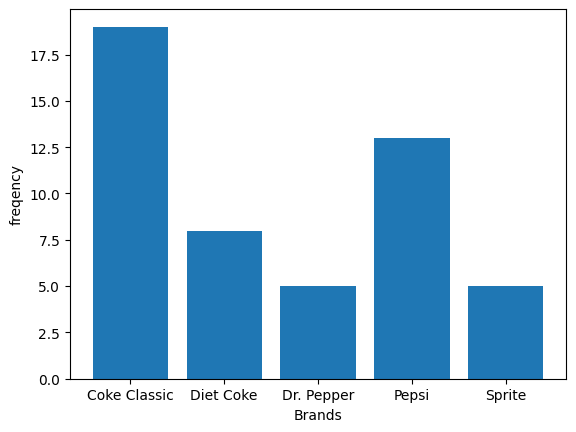

In [28]:
plt.bar(brand, counts)
plt.xlabel('Brands')
plt.ylabel('freqency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

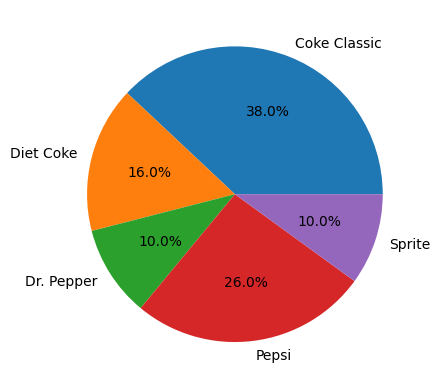

In [33]:
plt.pie(counts, labels=brand, autopct='%.1f%%')
plt.show

범주형 데이터 요약

In [34]:
Audit = pd.read_excel('./data/Audit.xlsx', header=0, usecols=[0])
Audit.head()

,Audit Time
0,12
1,14
2,14
3,13
4,15


In [36]:
audit = Audit['Audit Time']
print("min", audit.min())
print("max", audit.max())

min 12
max 33


In [37]:
audit_group = np.where(audit<=14, "10일~14일", 
                np.where(audit<=19, "15일~19일",
                np.where(audit<=24, "20일~24일",
                np.where(audit<=29, "25일~29일", "30일~34일"))))

In [40]:
audit_counts = pd.Series(audit_group).value_counts()
audit_table = pd.DataFrame(audit_counts, columns=['freq'])
audit_table.sort_index(inplace=True)
audit_table

,freq
10일~14일,4
15일~19일,8
20일~24일,5
25일~29일,2
30일~34일,1


In [43]:
audit_table['ratio'] = np.round(audit_table.freq/sum(audit_table.freq), 2)
audit_table["percentage_ratio"] = np.round(audit_table.freq/sum(audit_table.freq)*100, 2)
audit_table

,freq,ratio,percentage_ratio
10일~14일,4,0.20,20.0
15일~19일,8,0.40,40.0
20일~24일,5,0.25,25.0
25일~29일,2,0.10,10.0
30일~34일,1,0.05,5.0


<function matplotlib.pyplot.show(close=None, block=None)>

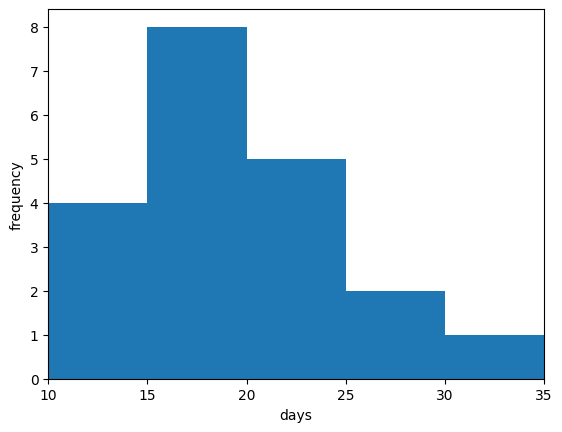

In [44]:
plt.hist(Audit['Audit Time'], bins=[0,15,20,25,30,35])
plt.xlim(10, 35)
plt.xlabel('days')
plt.ylabel('frequency')
plt.show

In [45]:
audit_table["cum_freq"] = np.cumsum(audit_table.freq)
audit_table["cum_ratio"] = np.cumsum(audit_table.ratio)
audit_table

,freq,ratio,percentage_ratio,cum_freq,cum_ratio
10일~14일,4,0.20,20.0,4,0.20
15일~19일,8,0.40,40.0,12,0.60
20일~24일,5,0.25,25.0,17,0.85
25일~29일,2,0.10,10.0,19,0.95
30일~34일,1,0.05,5.0,20,1.00


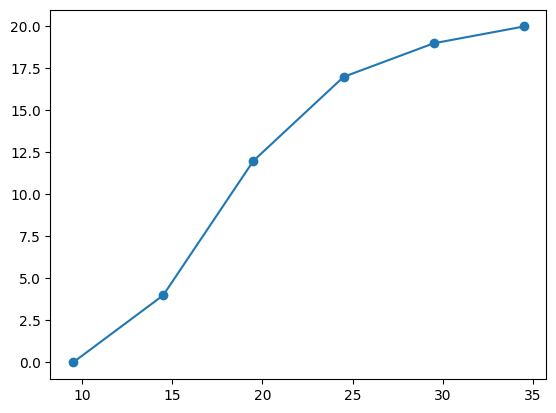

In [50]:
x_value = np.arange(9.5, 39.5, 5)
y_value = audit_table['cum_freq'].to_list()
y_value.insert(0,0)
plt.plot(x_value, y_value, marker='o')

2변수 데이터

In [51]:
Restaurant = pd.read_excel("./data/Restaurant.xlsx", header=0)
Restaurant.head()

,Restaurant,Quality Rating,Meal Price ($)
0,36,Good,10
1,52,Good,10
2,53,Very Good,10
3,60,Good,10
4,125,Good,10


In [54]:
conditions = [
    (Restaurant["Meal Price ($)"] < 20),
    (Restaurant["Meal Price ($)"] < 30),
    (Restaurant["Meal Price ($)"] < 40),
    (Restaurant["Meal Price ($)"] < 50),]
choices = ['10~19', '20~29', '30~39', '40~49']
Restaurant['Group'] = np.select(conditions, choices, default='N.A.')

Restaurant

,Restaurant,Quality Rating,Meal Price ($),Group
0,36,Good,10,10~19
1,52,Good,10,10~19
2,53,Very Good,10,10~19
3,60,Good,10,10~19
4,125,Good,10,10~19
...,...,...,...,...
295,35,Excellent,47,40~49
296,269,Excellent,47,40~49
297,67,Very Good,48,40~49
298,170,Excellent,48,40~49


In [56]:
cross_table = pd.crosstab(index=Restaurant['Quality Rating'], columns=Restaurant['Group'])
cross_table

Group,10~19,20~29,30~39,40~49
Quality Rating,,,,
Excellent,2,14,28,22
Good,42,40,2,0
Very Good,34,64,46,6


In [61]:
cross_table.loc['Sum'] = cross_table.sum(axis=0)
cross_table['Sum'] = cross_table.sum(axis=1)
cross_table


Group,10~19,20~29,30~39,40~49,Sum
Quality Rating,,,,,
Excellent,2,14,28,22,264
Good,42,40,2,0,336
Very Good,34,64,46,6,600
Sum,234,354,228,84,3600


In [63]:
Stereo = pd.read_excel("./data/Stereo.xlsx", header=0, index_col="Week")
Stereo

,No. of Commercials,Sales Volume
Week,,
1,2,50
2,5,57
3,1,41
4,3,54
5,4,54
6,1,38
7,5,63
8,3,48
9,4,59


<AxesSubplot: xlabel='No. of Commercials', ylabel='Sales Volume'>

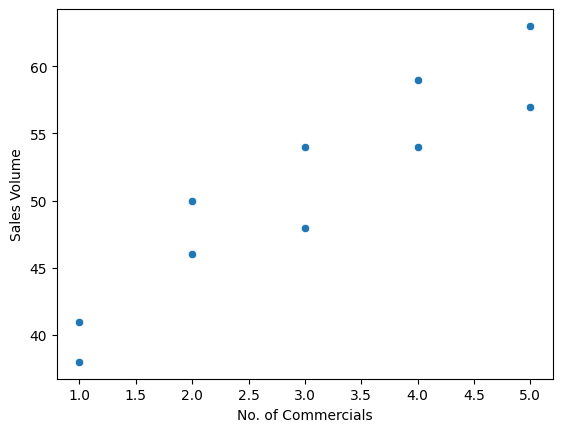

In [64]:
sns.scatterplot(x="No. of Commercials", y="Sales Volume", data=Stereo)

<AxesSubplot: xlabel='No. of Commercials', ylabel='Sales Volume'>

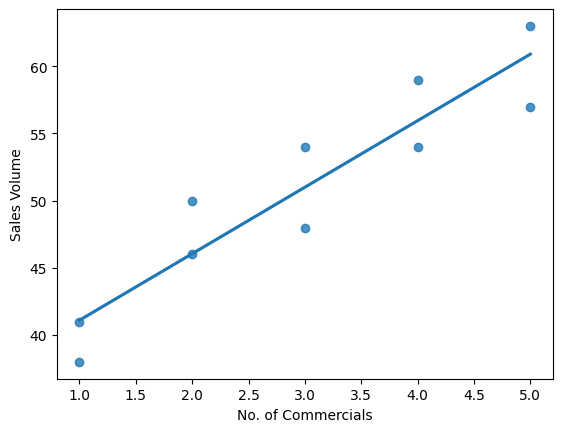

In [66]:
sns.regplot(x="No. of Commercials", y="Sales Volume", data=Stereo, ci=None)

In [68]:
%precision 2

'%.2f'

In [69]:
startsalary = pd.read_excel("./data/StartSalary.xlsx", header=0, index_col="Graduate", usecols=[0,1])
startsalary

,Starting Salary
Graduate,
1,3450
2,3550
3,3650
4,3480
5,3355
6,3310
7,3490
8,3730
9,3540


In [70]:
salary = np.array(startsalary['Starting Salary'])
salary

array([3450, 3550, 3650, 3480, 3355, 3310, 3490, 3730, 3540, 3925, 3520,
       3480])

In [71]:
#평균
sum(salary) / len(salary)

3540.00

In [72]:
np.mean(salary)

3540.00

In [73]:
#중앙값
sorted_salary = np.sort(salary)
sorted_salary

array([3310, 3355, 3450, 3480, 3480, 3490, 3520, 3540, 3550, 3650, 3730,
       3925])

In [74]:
n = len(sorted_salary)
if(n % 2 == 0) :
    x0 = sorted_salary[n//2 - 1]
    x1 = sorted_salary[n//2]
    median = (x0 + x1) / 2
else:
    median = sorted_salary[(n+1)//2 - 1]

x0, x1, median


(3490, 3520, 3505.00)

In [75]:
np.median(salary)

3505.00

In [76]:
#최빈값
pd.Series(salary).mode()

0    3480
dtype: int64

In [77]:
#모집단 분산
np.var(salary)

25154.17

In [79]:
#표본 분산
np.var(salary, ddof=1)

27440.91

In [80]:
np.std(salary, ddof=1)

165.65

In [82]:
#표본 표준 편차
np.sqrt(np.var(salary, ddof=1))

165.65